In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

Get Cheatsheet:

from https://drive.google.com/folderview?id=0ByIrJAE4KMTtaGhRcXkxNHhmY2M&usp=sharing


##Vectorization

The python numerical stack is based on a concept called vectorization. You have seen this in spreadsheets where you manipulate an entire column.

Whats the idea? It is that cpu's have some ability to carry out multiple things at one time, and we should use it to increase speed. But its also something else: there is a simplicity of notation. For example, see the following

In [2]:
a=[1,2,3,4,5]
b=[1,2,3,4,5]
print type(a)
print "============="
for index,aitem in enumerate(a):
    print a[index]*b[index]

<type 'list'>
1
4
9
16
25


We can rewrite this using numpy's list array object:

In [3]:
a=np.array([1,2,3,4,5])
print type(a)
b=np.array([1,2,3,4,5])

print a*b

<type 'numpy.ndarray'>
[ 1  4  9 16 25]


In [4]:
a+1

array([2, 3, 4, 5, 6])

##Pandas, the spreadsheet

In [5]:
df=pd.read_csv("cleaned.csv")#put in here the path to where you saved your csv file
df.head()

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name,author,genres
0,4.40,136455,0439023483,book,https://www.goodreads.com/author/show/153394.S...,2008,/genres/young-adult|/genres/science-fiction|/g...,dir01/2767052-the-hunger-games.html,2958974,"The Hunger Games (The Hunger Games, #1)",Suzanne_Collins,young-adult|science-fiction|dystopia|fantasy|s...
1,4.41,16648,0439358078,book,https://www.goodreads.com/author/show/1077326....,2003,/genres/fantasy|/genres/young-adult|/genres/fi...,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478,Harry Potter and the Order of the Phoenix (Har...,J_K_Rowling,fantasy|young-adult|fiction|fantasy|magic|chil...
2,3.56,85746,0316015849,book,https://www.goodreads.com/author/show/941441.S...,2005,/genres/young-adult|/genres/fantasy|/genres/ro...,dir01/41865.Twilight.html,2579564,"Twilight (Twilight, #1)",Stephenie_Meyer,young-adult|fantasy|romance|paranormal|vampire...
3,4.23,47906,0061120081,book,https://www.goodreads.com/author/show/1825.Har...,1960,/genres/classics|/genres/fiction|/genres/histo...,dir01/2657.To_Kill_a_Mockingbird.html,2078123,To Kill a Mockingbird,Harper_Lee,classics|fiction|historical-fiction|academic|s...
4,4.23,34772,0679783261,book,https://www.goodreads.com/author/show/1265.Jan...,1813,/genres/classics|/genres/fiction|/genres/roman...,dir01/1885.Pride_and_Prejudice.html,1388992,Pride and Prejudice,Jane_Austen,classics|fiction|romance|historical-fiction|li...


Notice we have a table! A spreadsheet! And it indexed the rows. This is the model, taken from the cheat-sheet in the link above.

![The structure of a Pandas Dataframe](https://dl.dropboxusercontent.com/u/75194/pandastruct.png)

Lets see the types of the columns...

In [6]:
df.dtypes

rating          float64
review_count      int64
isbn             object
booktype         object
author_url       object
year              int64
genre_urls       object
dir              object
rating_count      int64
name             object
author           object
genres           object
dtype: object

In [7]:
df.shape #tells u the shape of the table rows x columns

(5993, 12)

In [8]:
df.columns #the names of the columns

Index([u'rating', u'review_count', u'isbn', u'booktype', u'author_url', u'year', u'genre_urls', u'dir', u'rating_count', u'name', u'author', u'genres'], dtype='object')

In [9]:
type(df.rating), type(df)#as in diagram above, the datadrame is made up by concatenating columns.

(pandas.core.series.Series, pandas.core.frame.DataFrame)

###Playing with out Spreadsheet

Since True is coerced to 1 and False to 0 under the `np.mean` function the mean gives you the odds of the condition being true. 

In [10]:
100*np.mean(df.rating < 3.0) #percentage of ratings < 3.

0.066744535291173038

We can use the conditions to get a sub-spreadsheet.

In [11]:
df[df.rating > 4.5]

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name,author,genres
17,4.58,1314,0345538374,book,https://www.goodreads.com/author/show/656983.J...,1973,/genres/fantasy|/genres/classics|/genres/scien...,dir01/30.J_R_R_Tolkien_4_Book_Boxed_Set.html,68495,J.R.R. Tolkien 4-Book Boxed Set,J_R_R_Tolkien,fantasy|classics|science-fiction-fantasy|adven...
162,4.55,15777,075640407X,book,https://www.goodreads.com/author/show/108424.P...,2007,/genres/fantasy|/genres/fiction,dir02/186074.The_Name_of_the_Wind.html,210018,The Name of the Wind (The Kingkiller Chronicle...,Patrick_Rothfuss,fantasy|fiction
222,4.53,15256,055357342X,book,https://www.goodreads.com/author/show/346732.G...,2000,/genres/fantasy|/genres/fiction|/genres/fantas...,dir03/62291.A_Storm_of_Swords.html,327992,"A Storm of Swords (A Song of Ice and Fire, #3)",George_R_R_Martin,fantasy|fiction|fantasy|epic-fantasy|science-f...
242,4.53,5404,0545265355,book,https://www.goodreads.com/author/show/153394.S...,2010,/genres/young-adult|/genres/fiction|/genres/fa...,dir03/7938275-the-hunger-games-trilogy-boxset....,102330,The Hunger Games Trilogy Boxset (The Hunger Ga...,Suzanne_Collins,young-adult|fiction|fantasy|science-fiction|dy...
249,4.80,644,0740748475,book,https://www.goodreads.com/author/show/13778.Bi...,2005,/genres/sequential-art|/genres/comics|/genres/...,dir03/24812.The_Complete_Calvin_and_Hobbes.html,22674,The Complete Calvin and Hobbes,Bill_Watterson,sequential-art|comics|humor|sequential-art|gra...
284,4.58,15195,1406321346,book,https://www.goodreads.com/author/show/150038.C...,2013,/genres/fantasy|/genres/young-adult|/genres/fa...,dir03/18335634-clockwork-princess.html,130161,"Clockwork Princess (The Infernal Devices, #3)",Cassandra_Clare,fantasy|young-adult|fantasy|paranormal|romance...
304,4.54,572,0140259449,book,https://www.goodreads.com/author/show/1265.Jan...,1933,/genres/classics|/genres/fiction|/genres/roman...,dir04/14905.The_Complete_Novels.html,17539,The Complete Novels,Jane_Austen,classics|fiction|romance|literature|historical...
386,4.55,8820,0756404738,book,https://www.goodreads.com/author/show/108424.P...,2011,/genres/fantasy|/genres/fantasy|/genres/epic-f...,dir04/1215032.The_Wise_Man_s_Fear.html,142499,"The Wise Man's Fear (The Kingkiller Chronicle,...",Patrick_Rothfuss,fantasy|fantasy|epic-fantasy|science-fiction-f...
400,4.53,9292,1423140605,book,https://www.goodreads.com/author/show/15872.Ri...,2012,/genres/fantasy|/genres/young-adult|/genres/fa...,dir05/12127750-the-mark-of-athena.html,128412,"The Mark of Athena (The Heroes of Olympus, #3)",Rick_Riordan,fantasy|young-adult|fantasy|mythology|adventur...
475,4.57,824,1416997857,book,https://www.goodreads.com/author/show/150038.C...,2009,/genres/fantasy|/genres/young-adult|/genres/fa...,dir05/6485421-the-mortal-instruments-boxed-set...,39720,The Mortal Instruments Boxed Set (The Mortal I...,Cassandra_Clare,fantasy|young-adult|fantasy|paranormal|fantasy...


In [12]:
ratingseries=df.rating[df.rating > 4.0]#we can also get a sub-series.
ratingseries

0     4.40
1     4.41
3     4.23
4     4.23
5     4.25
6     4.22
7     4.38
9     4.18
10    4.03
12    4.36
13    4.05
15    4.09
17    4.58
19    4.28
20    4.02
...
5968    4.07
5969    4.23
5970    4.03
5975    4.09
5976    4.23
5977    4.02
5979    4.06
5980    4.26
5981    4.34
5983    4.12
5984    4.20
5986    4.09
5987    4.37
5988    4.17
5992    4.35
Name: rating, Length: 3374, dtype: float64

In [13]:
vals=ratingseries.values
print type(vals)

<type 'numpy.ndarray'>


One can obtain the numpy array to plot a histogram.

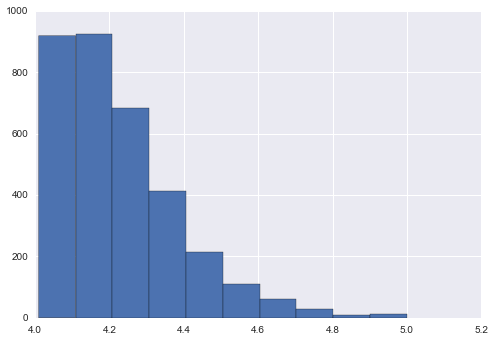

In [14]:
plt.hist(vals);

But one dosent have to

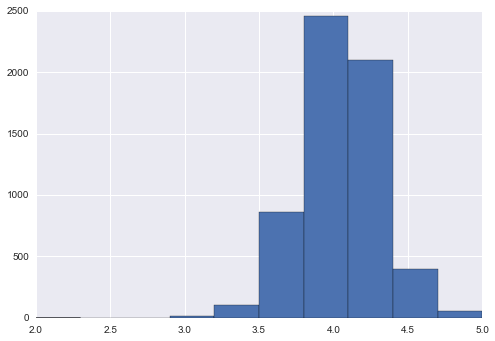

In [15]:
df.rating.hist();

###Making a nice plot

4.04199733022 4.04199733022 4.05


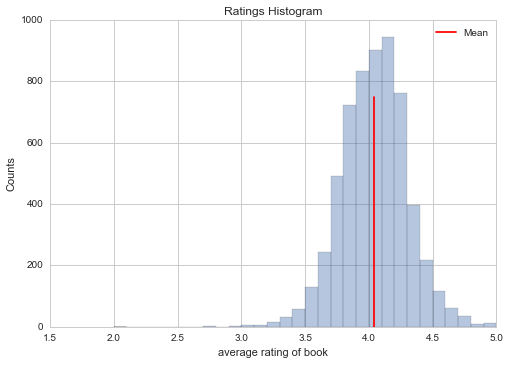

In [16]:
sns.set_context("notebook")
meanrat=df.rating.mean()
print meanrat, np.mean(df.rating), df.rating.median()
with sns.axes_style("whitegrid"):
    df.rating.hist(bins=30, alpha=0.4);
    plt.axvline(meanrat, 0, 0.75, color='r', label='Mean')#extend the line to upto 3/4 the vertical span
    plt.xlabel("average rating of book")
    plt.ylabel("Counts")
    plt.title("Ratings Histogram")
    plt.legend()
    #sns.despine()

A scatterplot

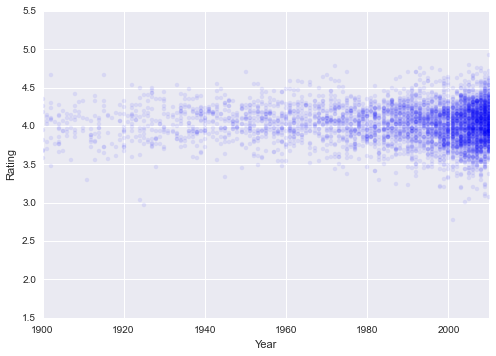

In [17]:
plt.scatter(df.year, df.rating, lw=0, alpha=.08)
plt.xlim([1900,2010])
plt.xlabel("Year")
plt.ylabel("Rating")

###Groupby

One can groupby a common property. Here we create a common property, the decade, groupby it, and calculate the mean rating every decade.

In [18]:
decade =  (df.year // 10) * 10
print type(decade)
decade_ratings = df.groupby(decade).rating
decade_mean=decade_ratings.mean()#or decade_ratings.apply(np.mean)
decade_mean.name = 'Decade Mean'
print decade_mean

<class 'pandas.core.series.Series'>
year
-1500    3.600000
-800     3.845000
-560     4.030000
-520     3.920000
-500     4.060000
-460     3.960000
-450     3.520000
-440     3.870000
-430     3.640000
-420     3.830000
-400     4.086667
-390     4.110000
-380     3.850000
-370     3.990000
-360     4.070000
...
1870    4.014400
1880    3.956053
1890    3.935946
1900    4.005246
1910    3.962549
1920    4.008222
1930    4.059375
1940    4.061360
1950    4.047135
1960    4.075707
1970    4.044161
1980    4.031509
1990    4.021173
2000    4.003405
2010    4.128055
Name: Decade Mean, Length: 90, dtype: float64


We plot this. The graph shows you many features of matplotlib plotting. Note we use the index of the series `decade_mean` as it got the index from our groupby.

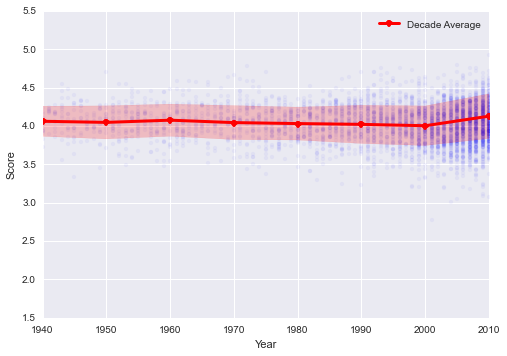

In [19]:
decade_std=decade_ratings.std()
plt.plot(decade_mean.index, decade_mean.values, 'o-',
        color='r', lw=3, label='Decade Average')#circle withline, red color, line width 3
plt.scatter(df.year, df.rating, alpha=.04, lw=0)#scatter plot with very low alpha 
plt.fill_between(decade_mean.index, (decade_mean + decade_std).values,
                 (decade_mean - decade_std).values, color='r', alpha=.2)
plt.xlabel("Year")
plt.ylabel("Score")
plt.legend(frameon=False)#show the legend obtained by taking the labels
plt.xlim([1940, 2010]);

Calculating means is not the only thing one can do. One can use `apply`, or get summary stats, or medians, or whatever.

In [20]:
df.groupby(decade).describe()

rating   review_count         year    rating_count
year                                                                
-1500 count     1.000000       1.000000     1.000000        1.000000
      mean      3.600000    1644.000000 -1500.000000    42026.000000
      std            NaN            NaN          NaN             NaN
      min       3.600000    1644.000000 -1500.000000    42026.000000
      25%       3.600000    1644.000000 -1500.000000    42026.000000
      50%       3.600000    1644.000000 -1500.000000    42026.000000
      75%       3.600000    1644.000000 -1500.000000    42026.000000
      max       3.600000    1644.000000 -1500.000000    42026.000000
-800  count     2.000000       2.000000     2.000000        2.000000
      mean      3.845000    3075.000000  -800.000000   297685.500000
      std       0.233345    3832.518754     0.000000   371319.448471
      min       3.680000     365.000000  -800.000000    35123.000000
      25%       3.762500    1720.000000  -800.000000   166404.250000
      50%       3.845000    3075.000000  -800.000000   297685.500000
      75%       3.927500    4430.000000  -800.000000   428966.750000
      max       4.010000    5785.000000  -800.000000   560248.000000
-560  count     1.000000       1.000000     1.000000        1.000000
      mean      4.030000     890.000000  -560.000000    71259.000000
      std            NaN            NaN          NaN             NaN
      min       4.030000     890.000000  -560.000000    71259.000000
      25%       4.030000     890.000000  -560.000000    71259.000000
      50%       4.030000     890.000000  -560.000000    71259.000000
      75%       4.030000     890.000000  -560.000000    71259.000000
      max       4.030000     890.000000  -560.000000    71259.000000
-520  count     1.000000       1.000000     1.000000        1.000000
      mean      3.920000    3559.000000  -512.000000   114619.000000
      std            NaN            NaN          NaN             NaN
      min       3.920000    3559.000000  -512.000000   114619.000000
      25%       3.920000    3559.000000  -512.000000   114619.000000
      50%       3.920000    3559.000000  -512.000000   114619.000000
...                  ...            ...          ...             ...
 1980 std       0.214197    2924.403625     2.833843    79492.348333
      min       3.250000      29.000000  1980.000000      253.000000
      25%       3.880000     341.250000  1982.000000     8910.500000
      50%       4.040000     688.000000  1985.000000    19077.000000
      75%       4.190000    1513.250000  1987.000000    48198.000000
      max       4.640000   36955.000000  1989.000000   876518.000000
 1990 count   784.000000     784.000000   784.000000      784.000000
      mean      4.021173    1925.116071  1994.946429    58461.426020
      std       0.248783    3830.486581     2.971072   152270.196261
      min       3.200000       1.000000  1990.000000      477.000000
      25%       3.860000     424.000000  1992.000000    10149.500000
      50%       4.030000     857.500000  1995.000000    23142.500000
      75%       4.180000    1870.250000  1998.000000    50146.500000
      max       4.750000   43022.000000  1999.000000  2816611.000000
 2000 count  1894.000000    1894.000000  1894.000000     1894.000000
      mean      4.003405    2951.842661  2005.319958    55921.280887
      std       0.257745    6773.937839     2.819645   154119.401821
      min       2.770000       4.000000  2000.000000       15.000000
      25%       3.830000     510.750000  2003.000000     9152.500000
      50%       4.015000    1127.000000  2006.000000    20563.000000
      75%       4.180000    2702.750000  2008.000000    46791.750000
      max       4.800000  136455.000000  2009.000000  2958974.000000
 2010 count  1409.000000    1409.000000  1409.000000     1409.000000
      mean      4.128055    2876.897090  2011.603974    30824.085167
      std       0.290664    6557.663015     1.205167    76459.444716
      min       

Of course, one can use stuff like apply on the entire data frame. The results can be used to create a new column.

In [21]:
df['tenrat'] = df.rating.apply(lambda x: 10*x)

In [22]:
df.head()

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name,author,genres,tenrat
0,4.40,136455,0439023483,book,https://www.goodreads.com/author/show/153394.S...,2008,/genres/young-adult|/genres/science-fiction|/g...,dir01/2767052-the-hunger-games.html,2958974,"The Hunger Games (The Hunger Games, #1)",Suzanne_Collins,young-adult|science-fiction|dystopia|fantasy|s...,44.0
1,4.41,16648,0439358078,book,https://www.goodreads.com/author/show/1077326....,2003,/genres/fantasy|/genres/young-adult|/genres/fi...,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478,Harry Potter and the Order of the Phoenix (Har...,J_K_Rowling,fantasy|young-adult|fiction|fantasy|magic|chil...,44.1
2,3.56,85746,0316015849,book,https://www.goodreads.com/author/show/941441.S...,2005,/genres/young-adult|/genres/fantasy|/genres/ro...,dir01/41865.Twilight.html,2579564,"Twilight (Twilight, #1)",Stephenie_Meyer,young-adult|fantasy|romance|paranormal|vampire...,35.6
3,4.23,47906,0061120081,book,https://www.goodreads.com/author/show/1825.Har...,1960,/genres/classics|/genres/fiction|/genres/histo...,dir01/2657.To_Kill_a_Mockingbird.html,2078123,To Kill a Mockingbird,Harper_Lee,classics|fiction|historical-fiction|academic|s...,42.3
4,4.23,34772,0679783261,book,https://www.goodreads.com/author/show/1265.Jan...,1813,/genres/classics|/genres/fiction|/genres/roman...,dir01/1885.Pride_and_Prejudice.html,1388992,Pride and Prejudice,Jane_Austen,classics|fiction|romance|historical-fiction|li...,42.3


In [23]:
df.to_csv("mynewfile.csv")